#Introduction

In this notebook we will create the time series model that will be uploaded onto our streamlit web app. Our web app will have the capability to predict stock price for (only) one day ahead. However limited it may be, we shall let this become our first step in developing our stock predictor and in the future I hope we can improve our model into being able to predict let's say 10 days ahead.

We will be using INTP.JK which is a stock ticker for PT Indocement Tunggal Prakarsa Tbk that we will use for our model training. First we import the necessary libraries including pandas_datareader overridden by yfin that we will use to load our stock price data.

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

Next we load our stock price dataframe using yfin. The dataframe is a table consisting of following features:

1. Open: The opening price during that day
2. High: The highest price during that day
3. Low: The lowest price during that day
4. Close: The closing price during that day
5. Adj Close: Adjusted Close Price
6. Volume: The volume of stocks being traded

In [2]:
#fetching our dataframe

start='2013-01-01'
end='2023-10-31'
df=yfin.download('INTP.JK',start,end)
df.head(30)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,21900.0,22600.0,21850.0,21900.0,14190.921875,3921000
2013-01-03,21950.0,22300.0,21700.0,21950.0,14223.322266,4714500
2013-01-04,22050.0,22200.0,21750.0,22050.0,14288.119141,4995000
2013-01-07,21850.0,22100.0,21800.0,21850.0,14158.522461,2262500
2013-01-08,22100.0,22250.0,21800.0,22100.0,14320.519531,3296500
2013-01-09,21900.0,22150.0,21750.0,21900.0,14190.921875,4266000
2013-01-10,21300.0,21900.0,21250.0,21300.0,13802.128906,3564500
2013-01-11,21400.0,21600.0,21300.0,21400.0,13866.928711,1987500
2013-01-14,21600.0,21800.0,21500.0,21600.0,13996.525391,1543000


And then we process the dataframe by resetting the index, and then dropping unnecessary features.

In [3]:
#resetting index so we can drop it later since we don't need 'Date' column.

df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,21900.0,22600.0,21850.0,21900.0,14190.921875,3921000
1,2013-01-03,21950.0,22300.0,21700.0,21950.0,14223.322266,4714500
2,2013-01-04,22050.0,22200.0,21750.0,22050.0,14288.119141,4995000
3,2013-01-07,21850.0,22100.0,21800.0,21850.0,14158.522461,2262500
4,2013-01-08,22100.0,22250.0,21800.0,22100.0,14320.519531,3296500


In [4]:
#Drop unnecessary features.

df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,21900.0,22600.0,21850.0,21900.0,3921000
1,21950.0,22300.0,21700.0,21950.0,4714500
2,22050.0,22200.0,21750.0,22050.0,4995000
3,21850.0,22100.0,21800.0,21850.0,2262500
4,22100.0,22250.0,21800.0,22100.0,3296500


Below is a little bit of how our rendered closing price history chart looks like.

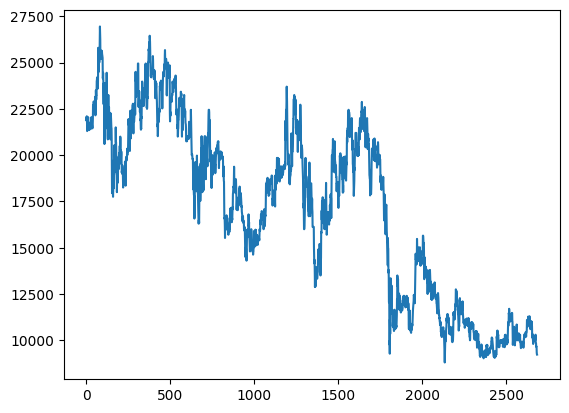

In [5]:
plt.plot(df.Close)

And then below we will try to calculate its daily MA100 and MA200. MA stands on moving average and it is usually used by technicalist as indicators to predict moving trend.

In [5]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2678    10316.75
2679    10312.75
2680    10304.25
2681    10293.75
2682    10287.00
Name: Close, Length: 2683, dtype: float64

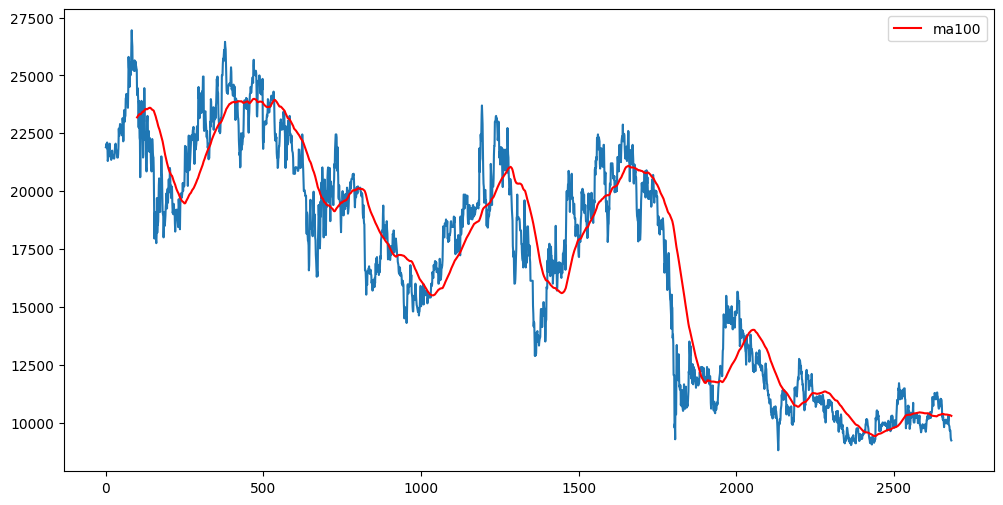

In [11]:
#plotting MA100

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',label='ma100')
plt.legend()
plt.show()

Below we tried to plot both MA100 and MA200. As you can see whenever MA100 (red line) passed the MA200 (yellow line) on upward direction, the closing price tends to rise and vice versa. This is because MA100 represents the most recent moving force and such most recent moving force represents the likeliest direction the stock price will go.

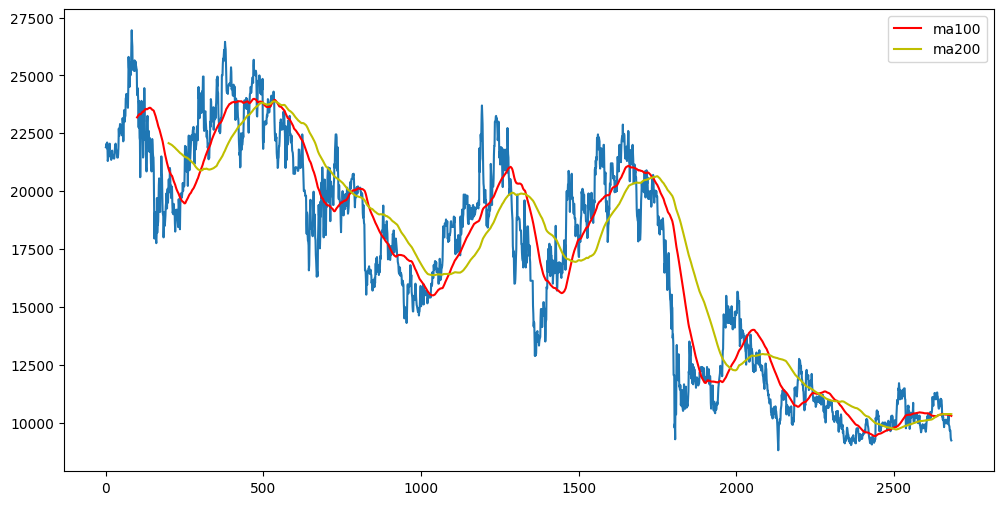

In [12]:
#plotting MA100 and MA200 together

ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',label='ma100')
plt.plot(ma200,'y',label='ma200')
plt.legend()
plt.show()

Exploratory data analysis above concluded that moving average are patterns that we can use to predict the closing price of future dates. And that is what we are going to do next. We will create a model that takes the last 100 days' closing price and then use them to predict next day's price.

First, let's separate between training and testing data. We will use 70:30 rule.

In [9]:
#splitting data into training/test
train=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
test=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

And then we scale the data so it will be compatible with our neural network model. I personally have tried this and not scaling our data will result in our model not being able to calculate the error/losses, hence impossible to evaluate.

In [10]:
#scale our training data

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=scaler.fit_transform(train)

Like I mentioned before, we will predict the closing price of the next day by using the last 100 days' closing price. So we can consider the last 100 days' price as our features (x_train) and the next day's price as our target (y_train). Let's create them.

In [11]:
#separating x_train and y_train

x_train = []
y_train = []
for i in range(100, train.shape[0]):
    x_train.append(train[i-100:i])
    y_train.append(train[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

And then we import libraries and create our model.

In [12]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [13]:
model=Sequential()
#first layer
model.add(LSTM(units=50, activation='tanh', return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
#second layer
model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.2))
#final layer
model.add(Dense(units=1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120)               82080     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 92601 (361.72 KB)
Trainable params: 92601 (361.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will create our own custom loss function that we will use to evaluate our model. The purpose for this custom function is to give bigger weight to our most recent days' closing price, a trait that is not exclusively exhibited by other loss function such as "mean_squared_error".

After that we will compile our built model with the custom loss function we just created and then fit our model to our data.

In [15]:
import keras.backend as K

def custom_loss(y_test, y_predicted):
    # Assuming y_true and y_pred are tensors with arbitrary dimensions

    # Flatten the tensors to 1D arrays
    y_true_flat = K.flatten(y_test)
    y_pred_flat = K.flatten(y_predicted)

    # Assign higher weight to more recent data
    weights = K.arange(1, K.shape(y_true_flat)[0] + 1, dtype='float32')
    weights = K.reverse(weights, axes=0)
    weights /= K.sum(weights)

    # Calculate mean squared error with weighted samples
    loss = K.mean(weights * K.square(y_true_flat - y_pred_flat), axis=-1)

    return loss

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile model
model.compile(optimizer='adam',loss=custom_loss)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='loss',  # Monitor loss
    patience=8,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Train model
model.fit(x_train,y_train,epochs=80,callbacks=[early_stopping])

Epoch 1/80
56/56 [==============================] - 14s 21ms/step - loss: 8.8730e-04
Epoch 2/80
56/56 [==============================] - 2s 28ms/step - loss: 1.5732e-04
Epoch 3/80
56/56 [==============================] - 2s 31ms/step - loss: 1.5020e-04
Epoch 4/80
56/56 [==============================] - 1s 24ms/step - loss: 1.3568e-04
Epoch 5/80
56/56 [==============================] - 1s 18ms/step - loss: 1.3427e-04
Epoch 6/80
56/56 [==============================] - 1s 21ms/step - loss: 1.3071e-04
Epoch 7/80
56/56 [==============================] - 1s 19ms/step - loss: 1.2220e-04
Epoch 8/80
56/56 [==============================] - 1s 12ms/step - loss: 1.1571e-04
Epoch 9/80
56/56 [==============================] - 1s 10ms/step - loss: 1.1641e-04
Epoch 10/80
56/56 [==============================] - 1s 9ms/step - loss: 1.2151e-04
Epoch 11/80
56/56 [==============================] - 1s 10ms/step - loss: 1.0991e-04
Epoch 12/80
56/56 [==============================] - 1s 10ms/step - loss: 

We have just fitted our model with our training data. Now let's test our model on our test data. But we will have to append our testing data to our last 100 days' data so our first row testing data have something to predict from. We will call our appended testing data 'input_data'. Don't forget to scale input_data also.

In [18]:
#Appending test data to past 100 data, and scale it

past100=pd.DataFrame(df.Close[0:int(len(df)*0.7)]).tail(100)
final_df=past100.append(test,ignore_index=True)
input_data=scaler.transform(final_df)
input_data

<ipython-input-18-db35fb3181e8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past100.append(test,ignore_index=True)


array([[ 0.42432815],
       [ 0.4115983 ],
       [ 0.39745403],
       [ 0.36492221],
       [ 0.40311174],
       [ 0.42574257],
       [ 0.45120226],
       [ 0.45544554],
       [ 0.45403112],
       [ 0.41301273],
       [ 0.3748232 ],
       [ 0.36350778],
       [ 0.34229137],
       [ 0.33804809],
       [ 0.31966054],
       [ 0.30127298],
       [ 0.27015559],
       [ 0.35360679],
       [ 0.32390382],
       [ 0.32107496],
       [ 0.24752475],
       [ 0.25601132],
       [ 0.23338048],
       [ 0.15700141],
       [ 0.15700141],
       [ 0.15700141],
       [ 0.02828854],
       [ 0.03818953],
       [ 0.        ],
       [ 0.10466761],
       [ 0.06082037],
       [ 0.06082037],
       [ 0.17680339],
       [ 0.23055163],
       [ 0.17821782],
       [ 0.1824611 ],
       [ 0.16407355],
       [ 0.14427157],
       [ 0.14992928],
       [ 0.20792079],
       [ 0.17680339],
       [ 0.12871287],
       [ 0.13154173],
       [ 0.12164074],
       [ 0.13295615],
       [ 0

In [19]:
input_data.shape

(905, 1)

And then we separate them into x_test and y_test just like we did with x_train and y_train.

In [20]:
#Separate x_test and y_test

x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

After that we predict our closing price using x_test. Our prediction is called 'y_prediction'. Then we will compare y_prediction with y_test to measure our mean squared error. Lastly we will plot both our y_predicted and y_test to visualize just how precise our model is.

In [21]:
#Making prediction

y_predicted=model.predict(x_test)

26/26 [==============================] - 1s 7ms/step


In [22]:
#Measure Mean Squared Error

from sklearn.metrics import mean_squared_error

y_predicted=y_predicted*(scaler.data_max_-scaler.data_min_)+scaler.data_min_
y_test=y_test*(scaler.data_max_-scaler.data_min_)+scaler.data_min_
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 67575.10172922247


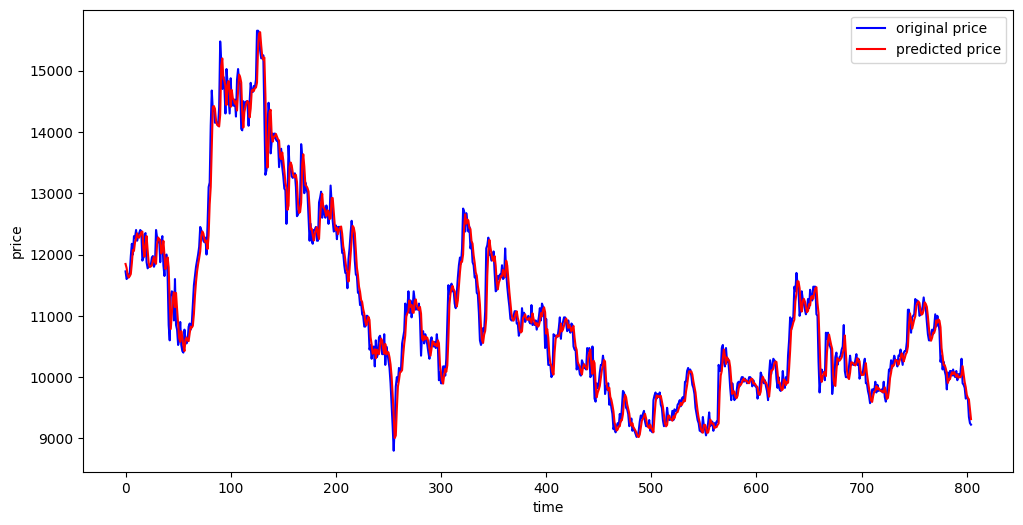

In [23]:
#Plot y_predicted vs y_test

plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

It turns out our model did very well with only MSE of 65000. This translates to Mean Absolute Error of around 250. This means that on average our prediction will only deviates against our actual data by ~250 Indonesian Rupiah. The y_predicted (predicted price) also seems to fit very well with our y_test (original price) in the chart we just plotted.

Now that our model is good enough, let's save the model. We will load this model in our .py file which will be uploaded to streamlit web app.

In [17]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
